# Importing Libraries and Changing Plot Size

In [2]:
library(fpp2)
library(astsa)
library(tseries)
options(repr.plot.width=14, repr.plot.height=7)

# Importing Dataset

In [3]:
#These are not the train and test sets I will use, since the train consists of only 4/5 months
# I will perform 1-year forecasts
delhi_train=read.csv('Dataset/DailyDelhiClimateTrain.csv')
delhi_test=read.csv('Dataset/DailyDelhiClimateTest.csv')

In [4]:
delhi=rbind(delhi_train,delhi_test)

# Arranging the dataset

In [5]:
#I will only be analyzing the mean temperature
delhi=delhi[,2]

In [6]:
#All the days between the 1st of January 2013 to the 24th of April 2017
dates=seq(as.Date("2013-01-01"), as.Date("2017-4-24"), by = "day")

In [7]:
#Creating a time-series
delhi=ts(delhi, start = c(2013, as.numeric(format(dates[1], "%j"))), frequency = 365)

In [8]:
str(delhi)

 Time-Series [1:1576] from 2013 to 2017: 10 7.4 7.17 8.67 6 ...


# Ploting the Time Series, the ACF and the PACF

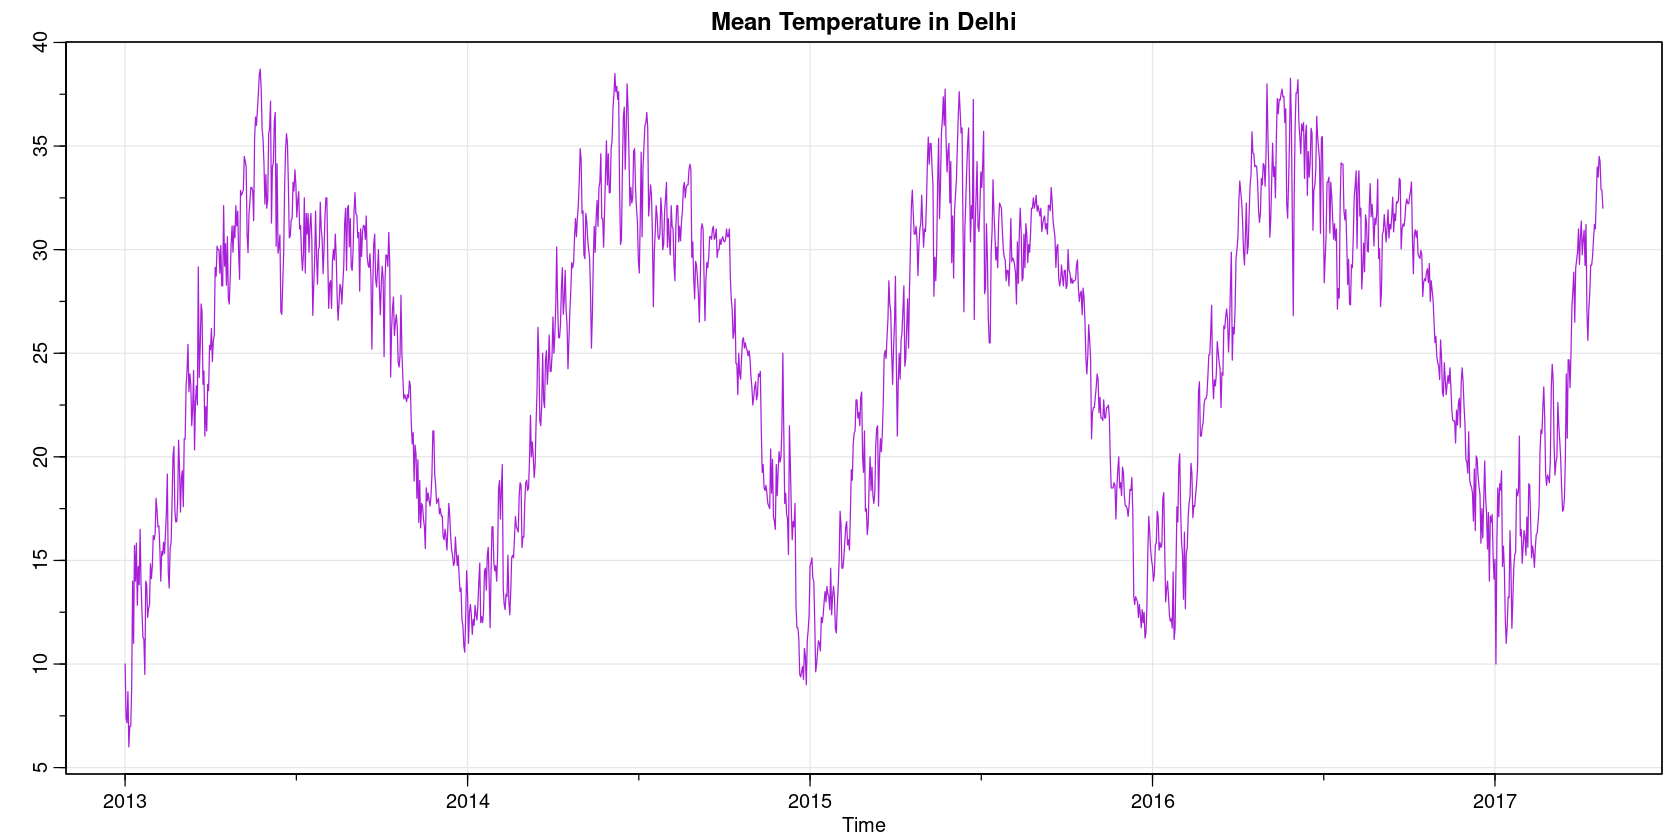

In [9]:
tsplot(delhi,main="Mean Temperature in Delhi", col=rgb(.66,.12,.85), pch=19, ylab="")

There's seasonality in the time series. The peaks ought to correspond to the warmer months and the troughs to the colder months. It appears to be a very slight trend in the data.

ACF,0.97,0.95,0.94,0.93,0.92,0.91,0.90,0.89,0.88,0.88,⋯,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02
PACF,0.97,0.13,0.08,0.12,0.06,0.05,0.02,0.04,0.03,0.06,⋯,0.01,0.01,0.01,0.00,-0.02,0.00,-0.01,-0.01,0.00,0.00


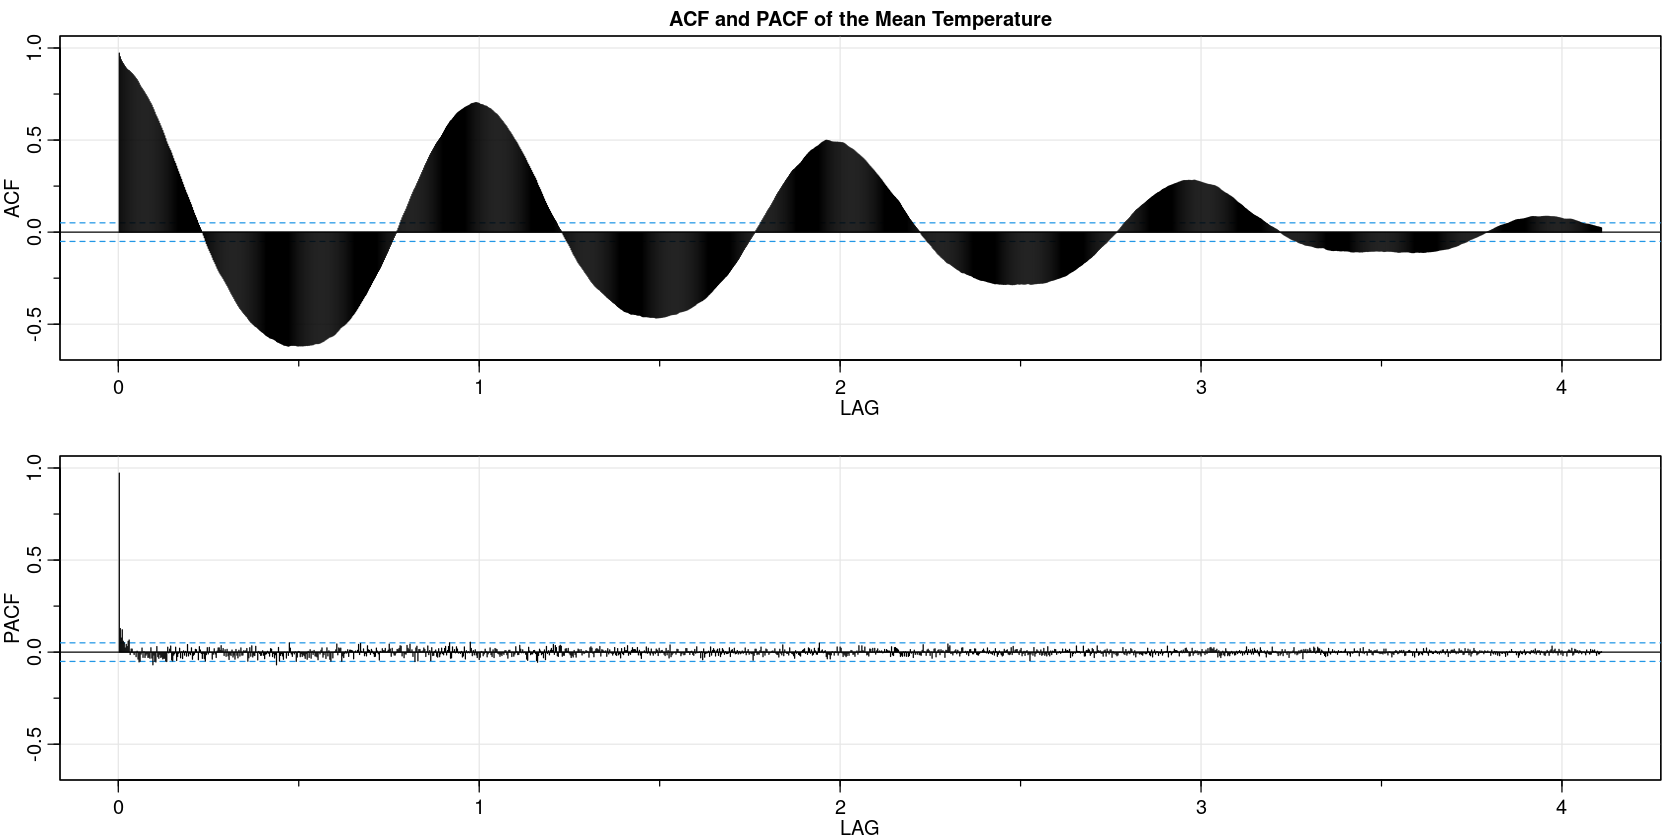

In [10]:
acf2(delhi,main='ACF and PACF of the Mean Temperature',max.lag=1500)

From the sample ACF, one can see that the correlation between random variables decreases very slowly as the lag increases. One can also see the cycles very clearly. The amplitude of these cycles decreases as the lag increases.

Regarding the sample PACF, despite being very high at lag 1, it rapidly tends to 0, meaning that there's no correlation between variables which are a certain number of lags apart, if we neglect the effects of the variables between them.

# Dividing into Train and Test Set

In [11]:
#Train set: 1 January,2013 up to 25 April, 2016
#Test set: 26 April, 2016 up to 24 April, 2017
delhi_train=window(delhi,end=2016+115/365)
delhi_test=window(delhi,start=2016+116/365)

In [12]:
str(delhi_train)
str(delhi_test)

 Time-Series [1:1211] from 2013 to 2016: 10 7.4 7.17 8.67 6 ...
 Time-Series [1:365] from 2016 to 2017: 33.4 33.1 34.2 34.1 33.1 ...


# Using the Holt-Winters Filter

## Additive method

In [13]:
hw_a=HoltWinters(delhi_train,seasonal="additive")

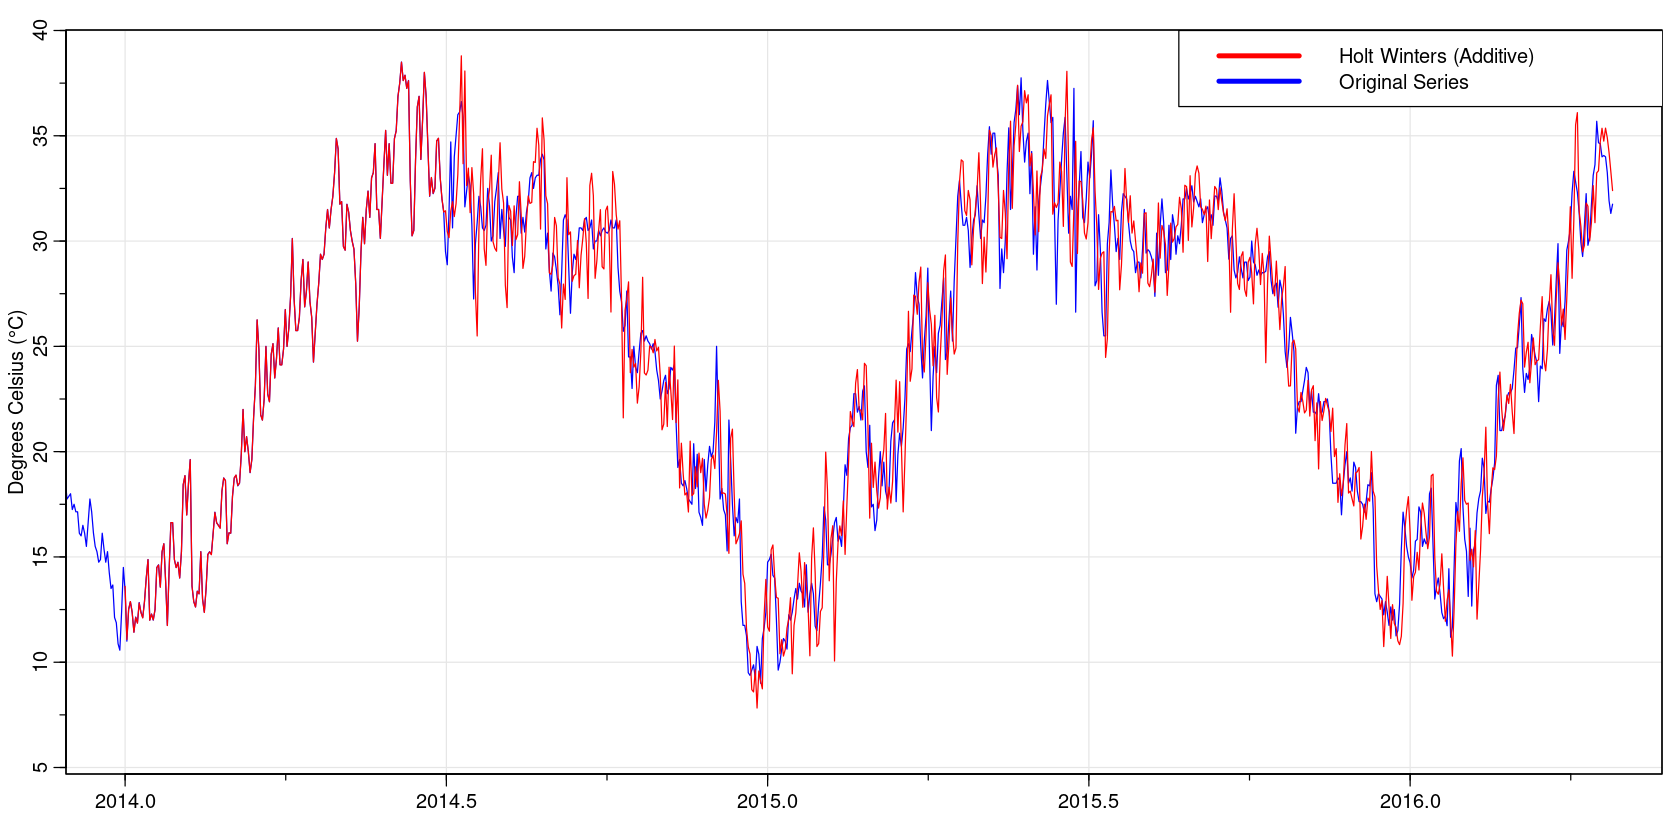

In [14]:
tsplot(delhi_train,col='blue',lwd=1, xlim=c(2014,2016.3),xlab='',ylab='Degrees Celsius (°C)')
lines(hw_a$fitted[,1],col='red')
legend(2015.64, 40, legend=c("Holt Winters (Additive)", "Original Series"),
       col=c("red", "blue"), lty=1, lwd=4, cex=1)

In [15]:
hw_a_forecast=forecast(hw_a,365)

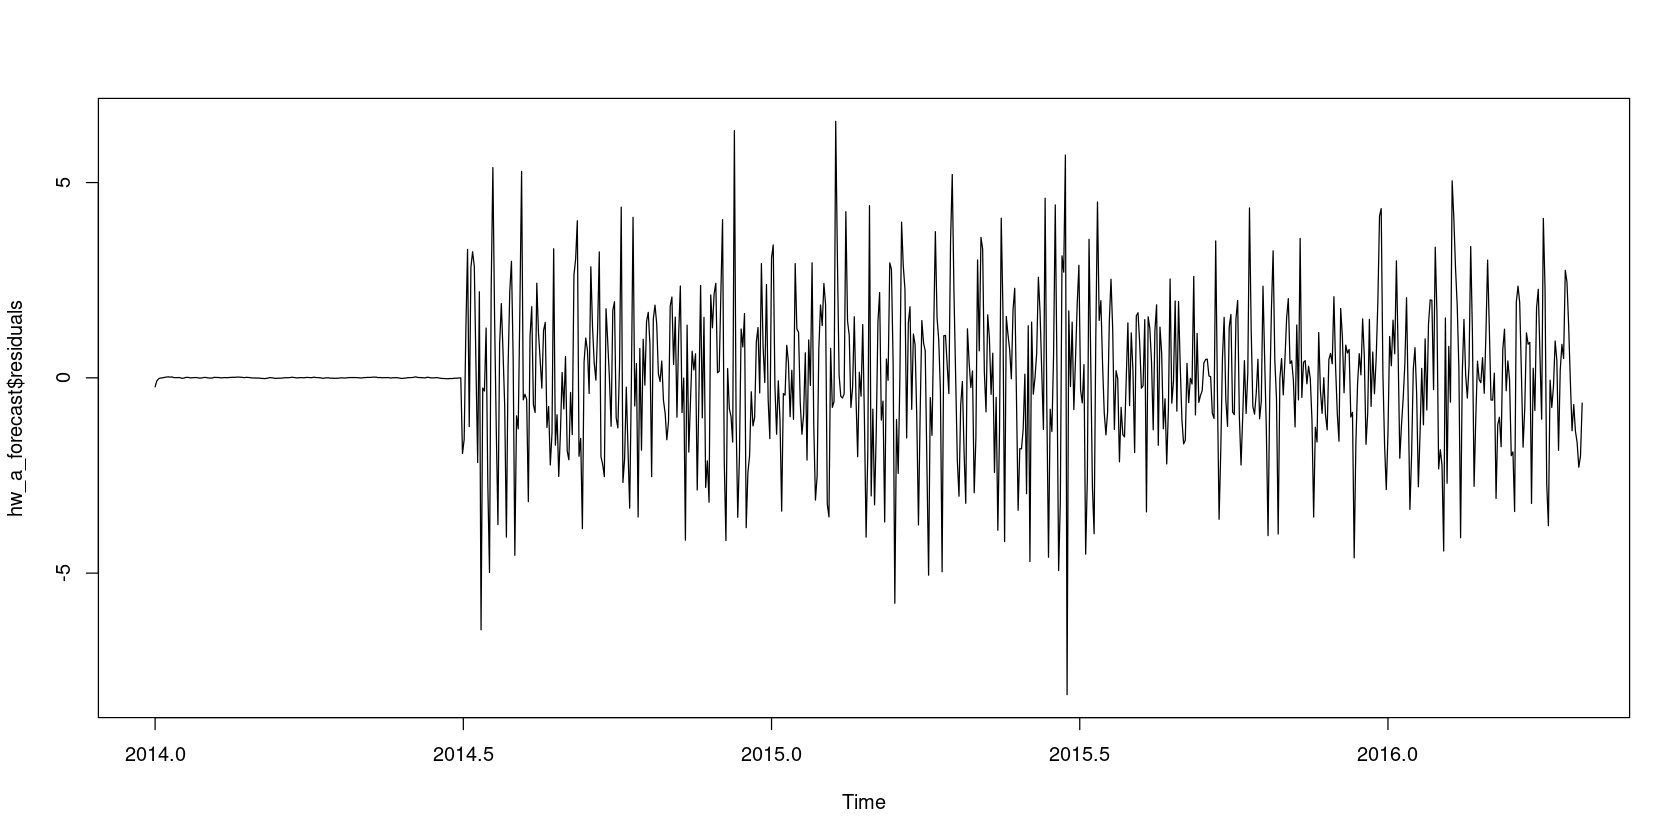

In [16]:
plot(hw_a_forecast$residuals,xlim=c(2014,2016.3))

ACF,0.17,-0.14,-0.21,-0.06,-0.02,-0.01,-0.02,-0.02,-0.08,-0.02,⋯,0.00,0.00,0,0,0.00,0.00,0.00,0,0.00,0.00
PACF,0.17,-0.17,-0.16,-0.03,-0.07,-0.04,-0.05,-0.04,-0.11,-0.02,⋯,-0.02,0.01,0,0,-0.01,-0.02,0.02,0,-0.01,-0.02


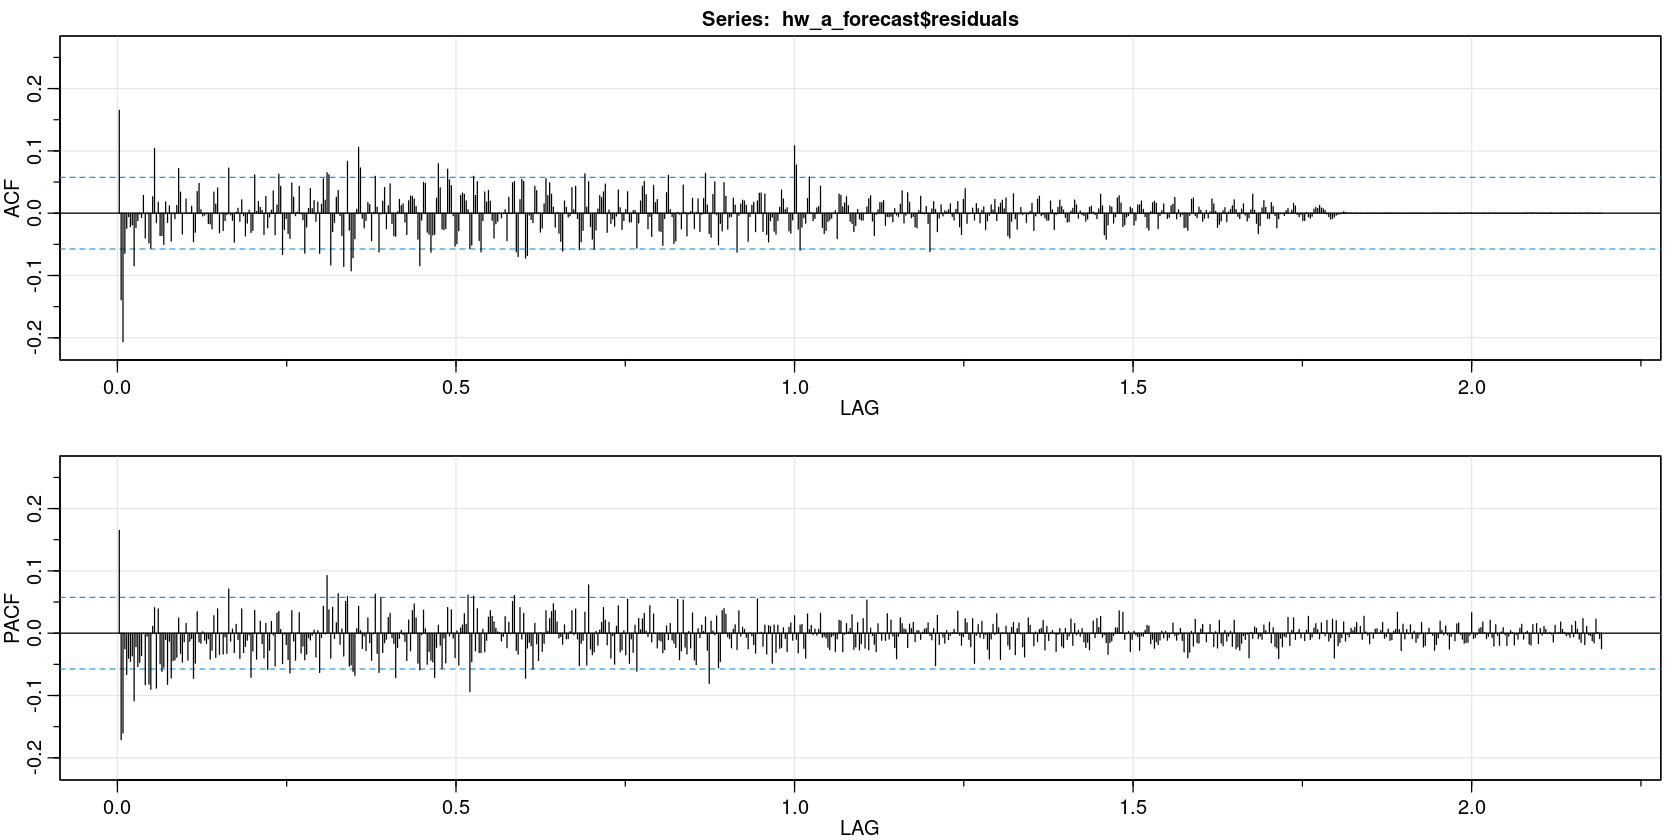

In [17]:
acf2(hw_a_forecast$residuals,max.lag = 800)

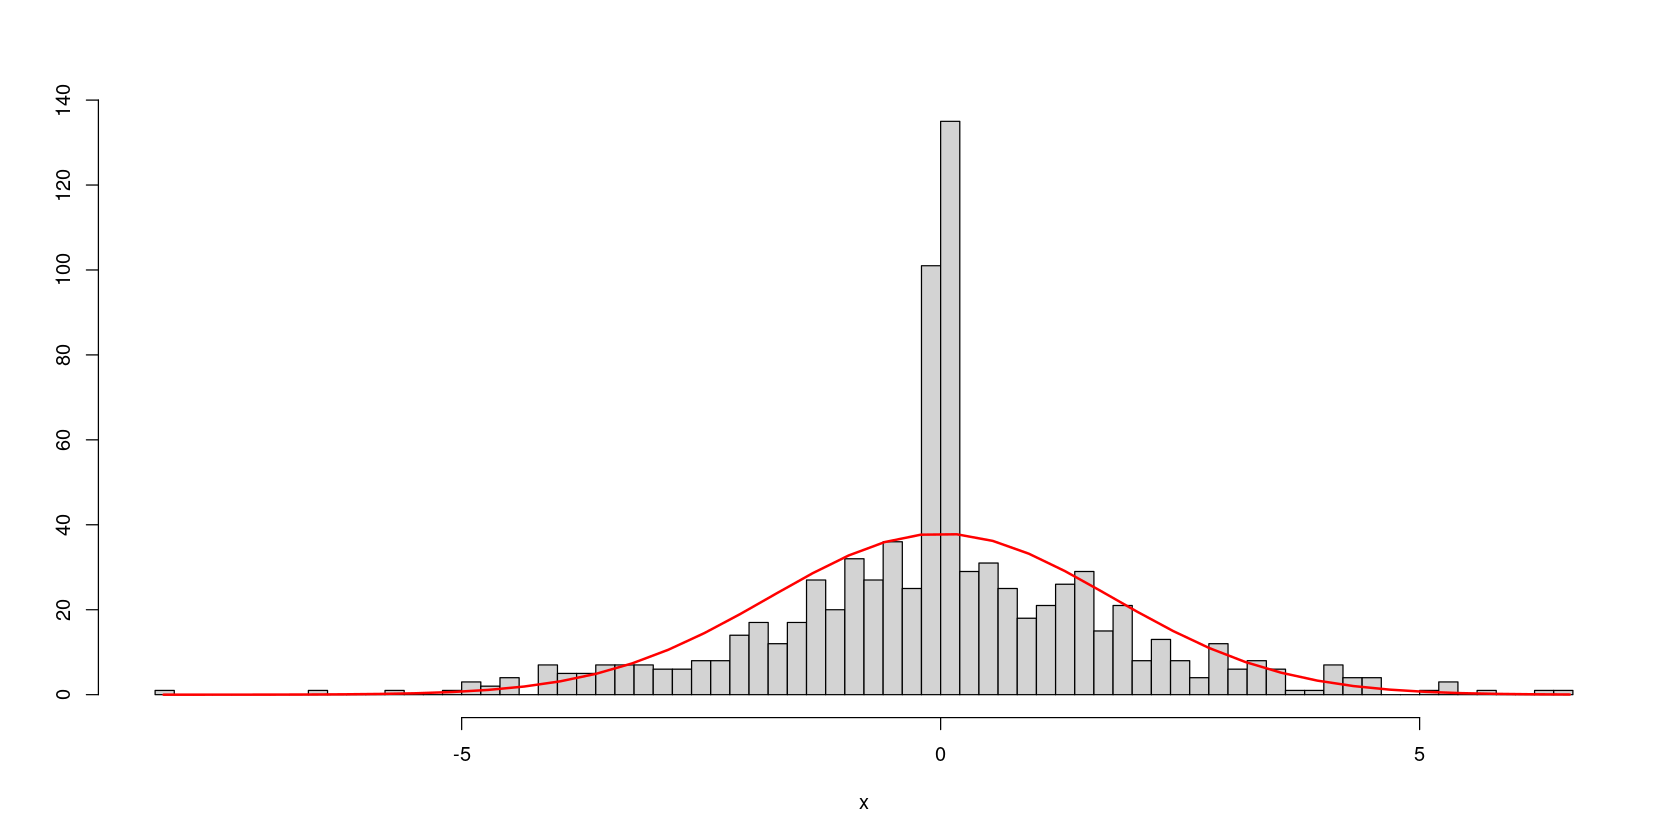

In [18]:
x=hw_a_forecast$residuals[366:1211]
h=hist(x, breaks=100,ylab='',main='')
xfit=seq(min(x),max(x),length=40)
yfit=dnorm(xfit,mean=mean(x),sd=sd(x))
yfit=yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="red", lwd=2)

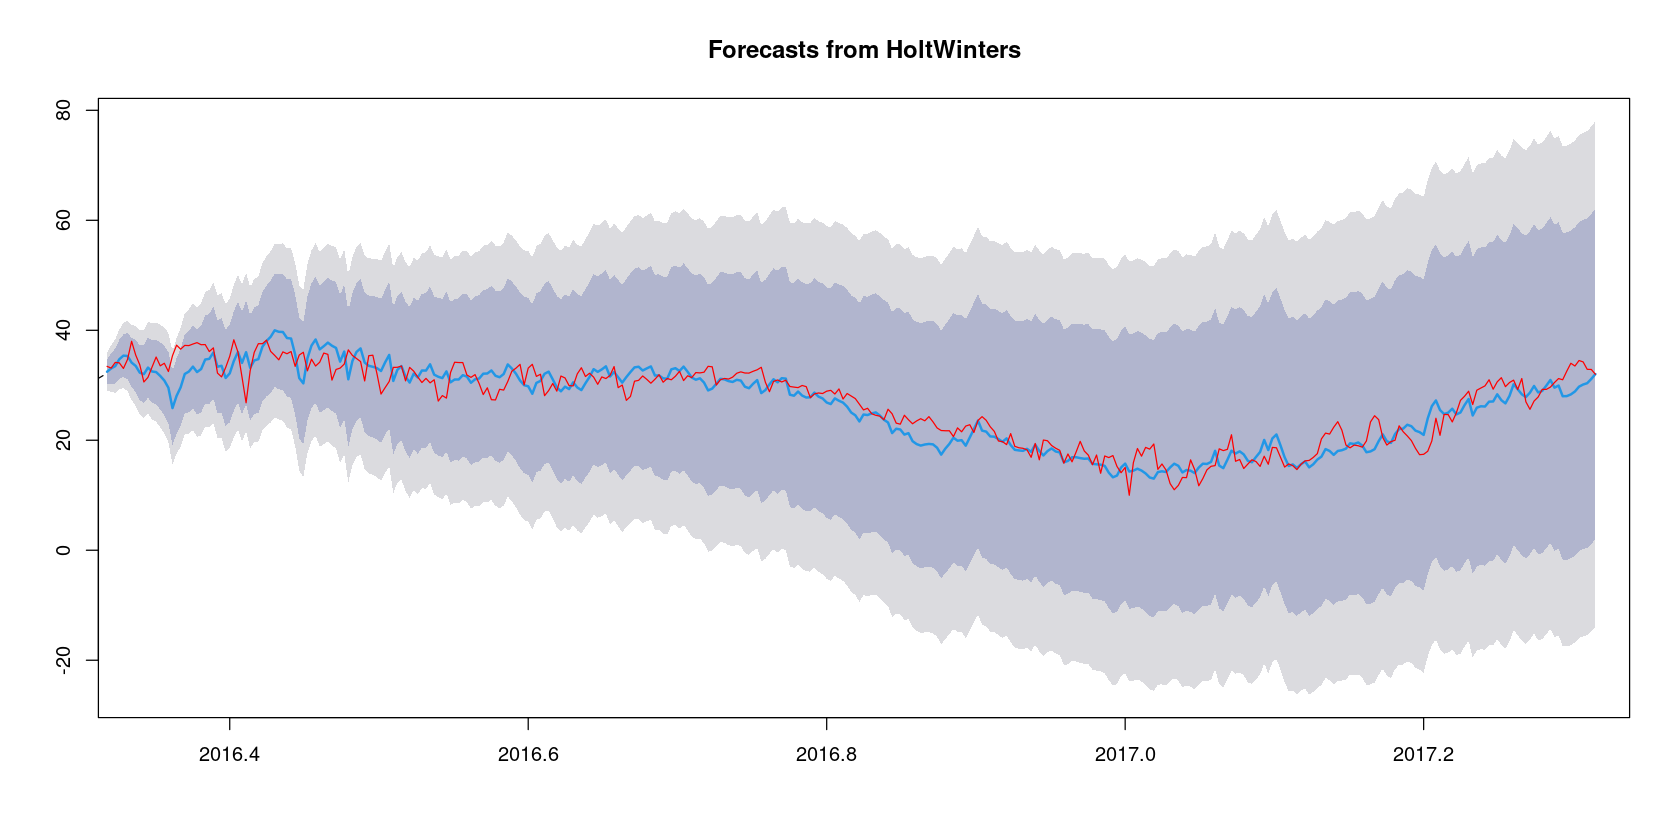

In [19]:
plot(hw_a_forecast,xlim=c(2016.35,2017.3))
lines(delhi_test,col='red')

In [20]:
accuracy(hw_a_forecast,delhi_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.001466422,1.778531,1.218565,-0.2110244,5.408582,0.4779311,0.1651191,NA
Test set,0.470783461,2.730049,2.158057,1.2606799,8.542776,0.8464074,0.6909964,1.397886


## Multiplicative method

In [21]:
hw_m=HoltWinters(delhi_train,seasonal="multiplicative")

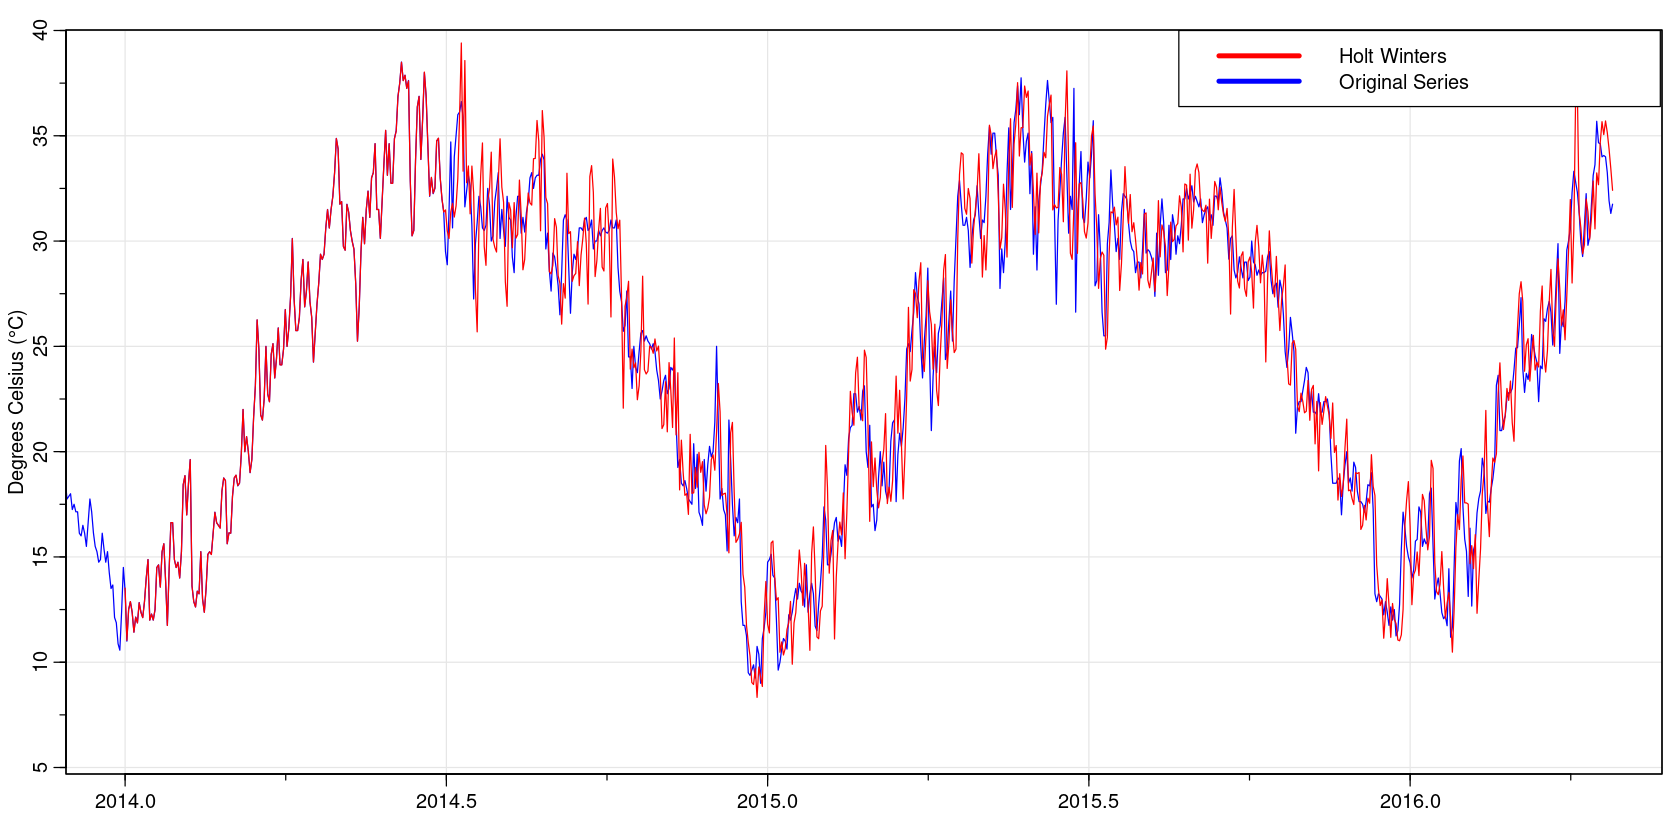

In [22]:
tsplot(delhi_train,col='blue',lwd=1, xlim=c(2014,2016.3),xlab='',ylab='Degrees Celsius (°C)')
lines(hw_m$fitted[,1],col='red')
legend(2015.64, 40, legend=c("Holt Winters", "Original Series"),
       col=c("red", "blue"), lty=1, lwd=4, cex=1)

In [23]:
hw_m_forecast=forecast(hw_m,365)

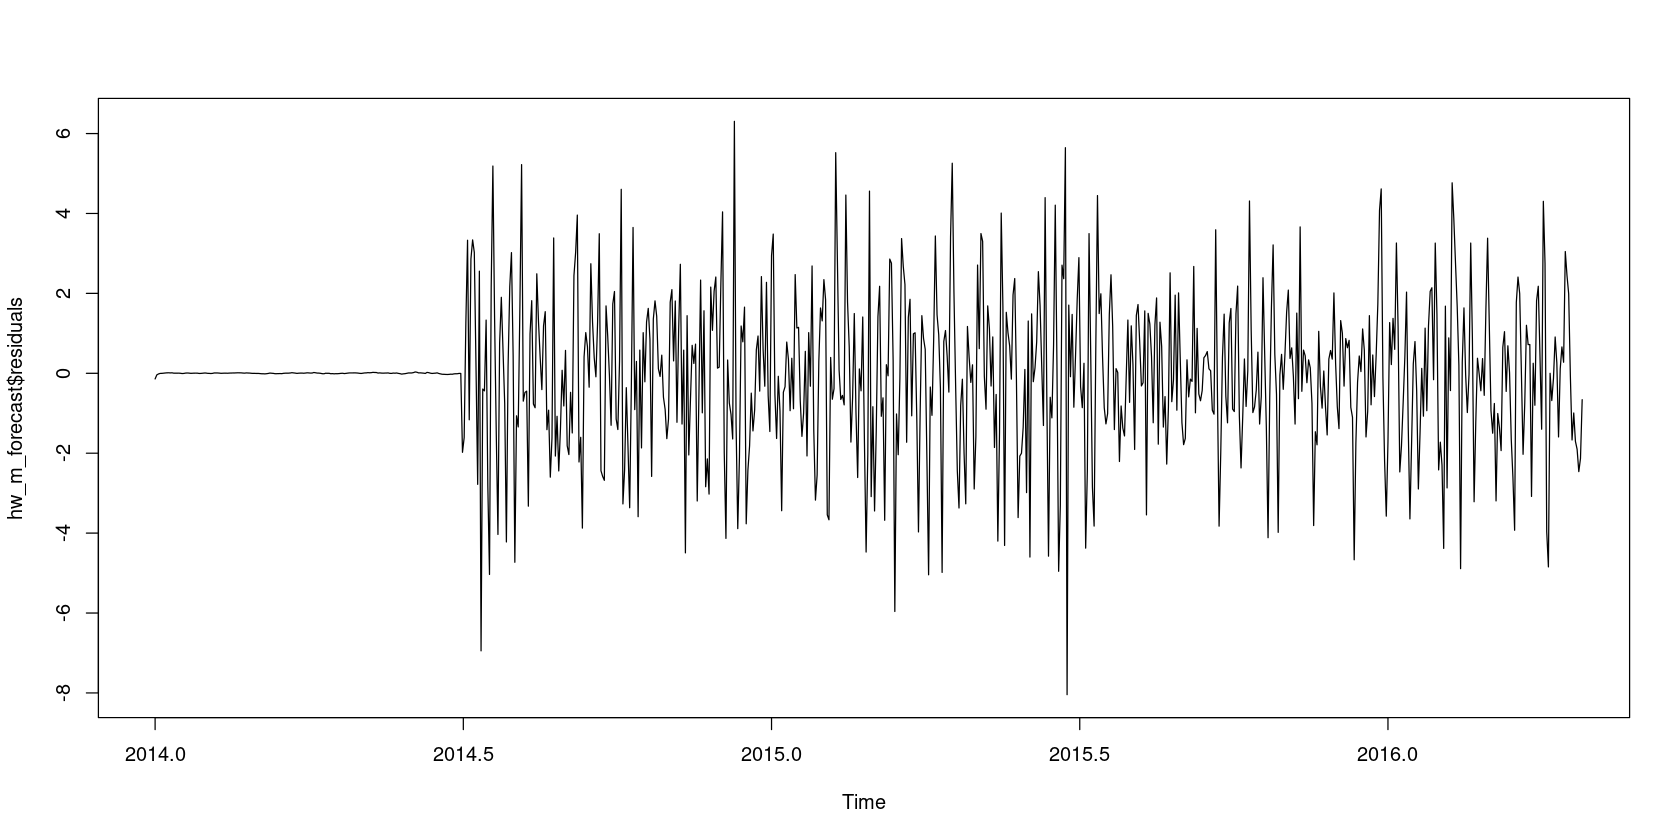

In [24]:
plot(hw_m_forecast$residuals,xlim=c(2014,2016.3))

ACF,0.16,-0.15,-0.21,-0.06,-0.01,-0.02,-0.02,-0.02,-0.08,-0.02,⋯,0.00,0.00,0,0,0.00,0.00,0.00,0,0.00,0.00
PACF,0.16,-0.18,-0.16,-0.02,-0.06,-0.05,-0.04,-0.04,-0.11,-0.02,⋯,-0.02,0.01,0,0,-0.01,-0.01,0.02,0,-0.01,-0.02


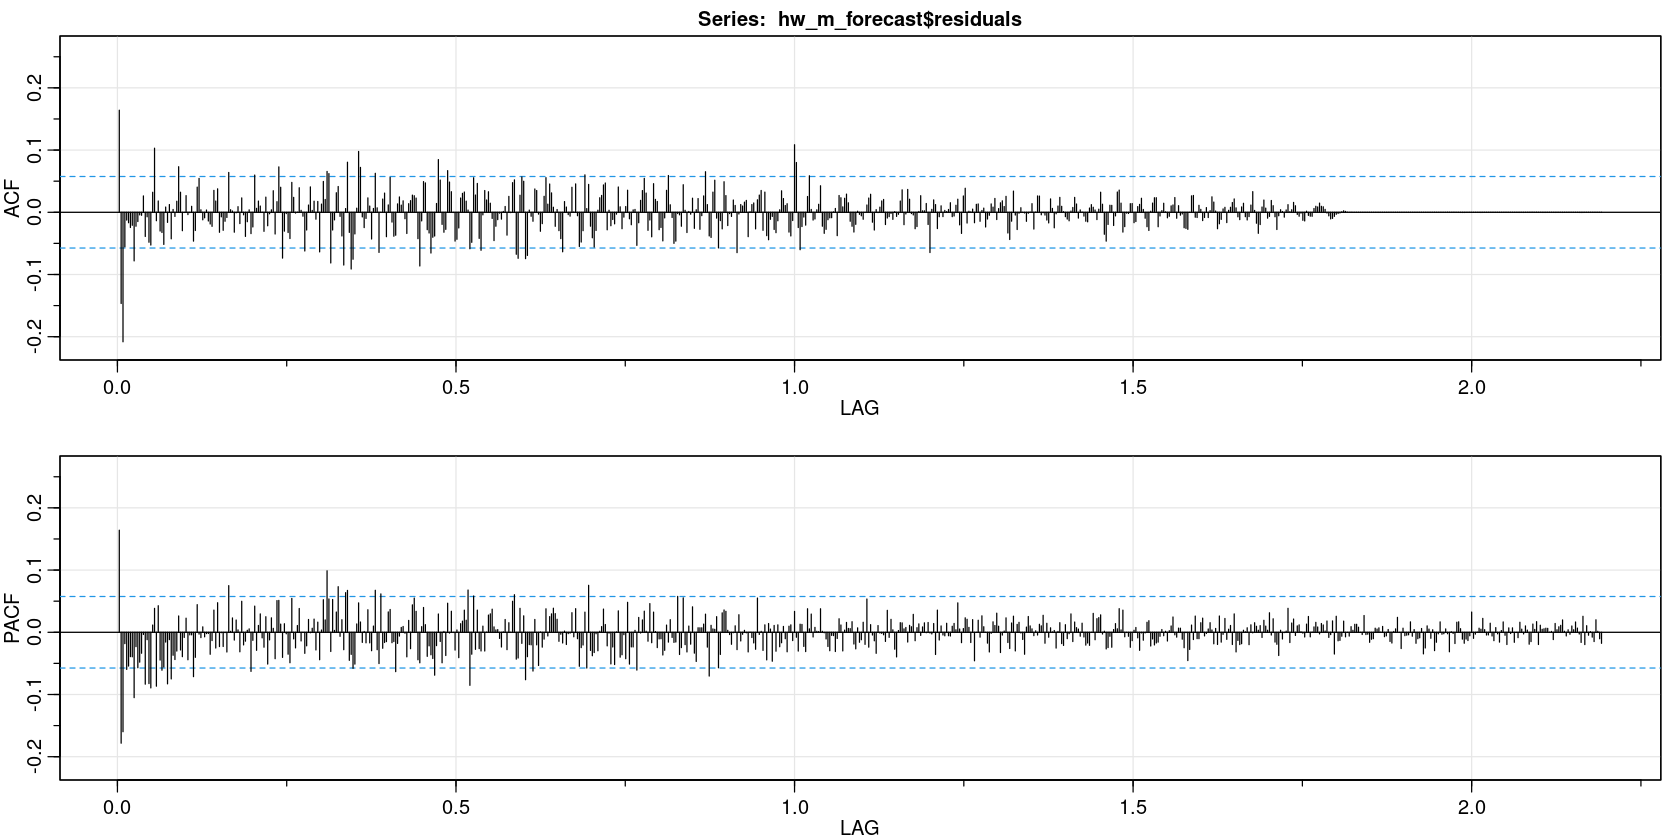

In [25]:
acf2(hw_m_forecast$residuals,max.lag = 800)

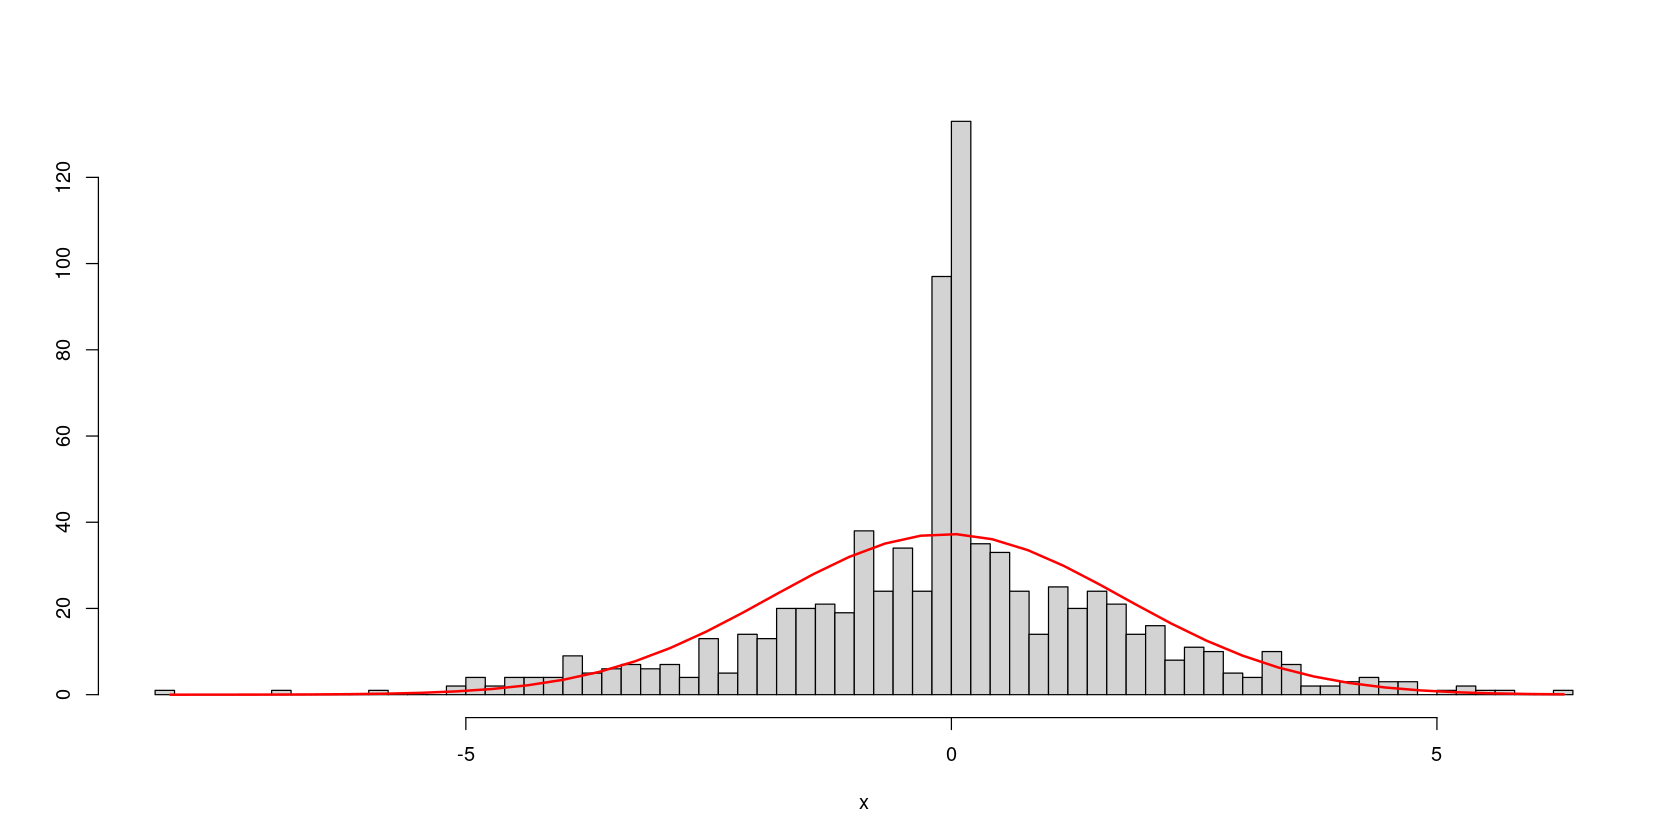

In [26]:
x=hw_m_forecast$residuals[366:1211]
h=hist(x, breaks=100,ylab='',main='')
xfit=seq(min(x),max(x),length=40)
yfit=dnorm(xfit,mean=mean(x),sd=sd(x))
yfit=yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="red", lwd=2)

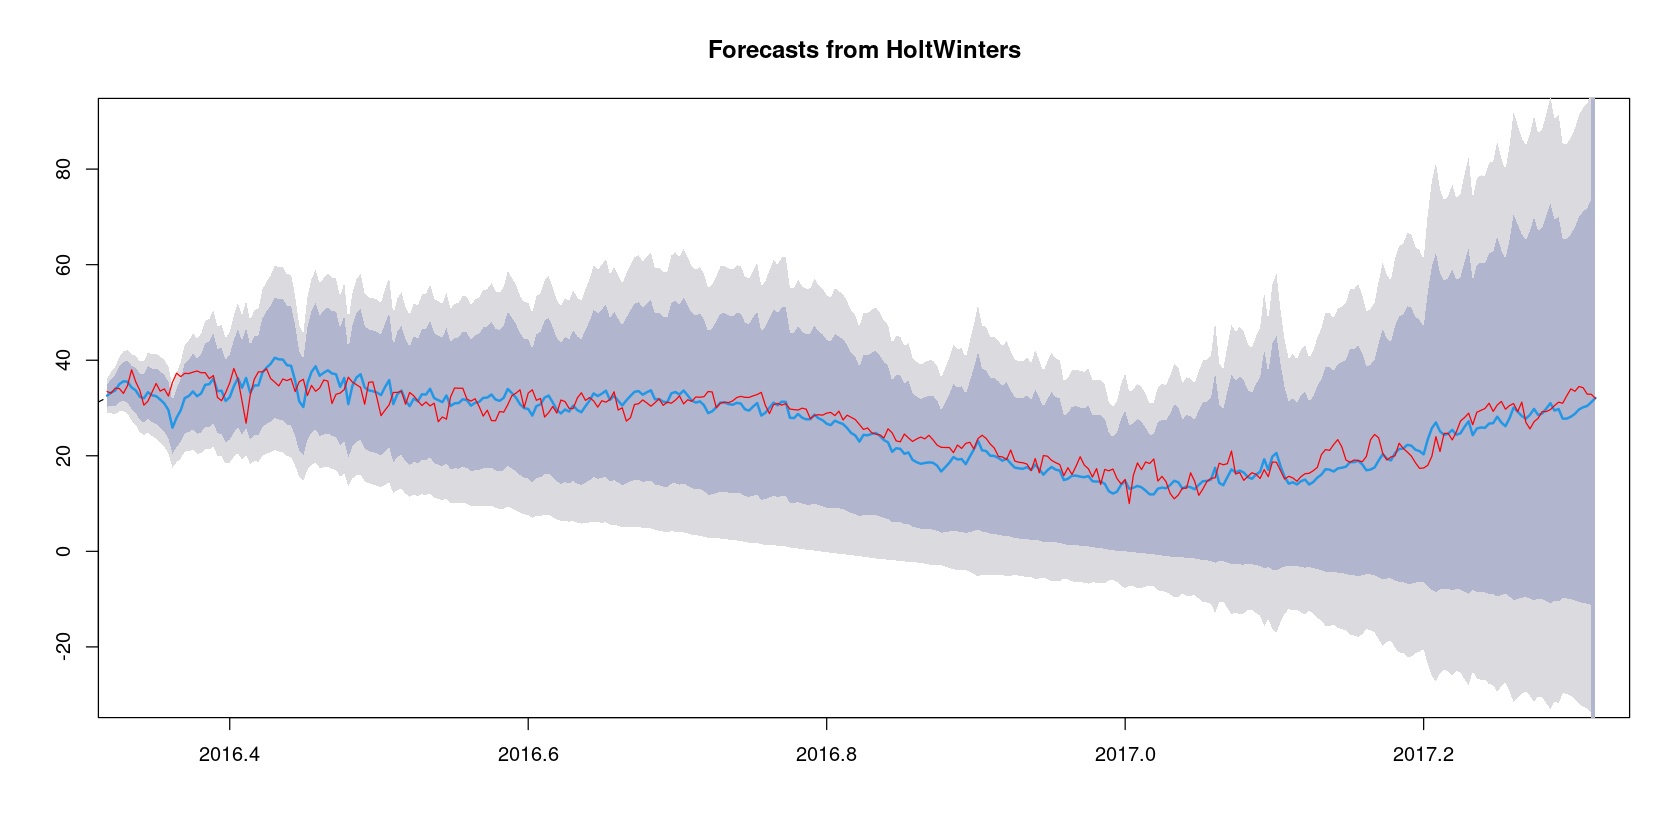

In [27]:
plot(hw_m_forecast,xlim=c(2016.35,2017.3),ylim=c(-30,90))
lines(delhi_test,col='red')

In [28]:
accuracy(hw_m_forecast,delhi_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.04768377,1.810050,1.244477,-0.4472027,5.495030,0.4880940,0.1640659,NA
Test set,0.77945771,2.919756,2.321384,3.0739468,9.183599,0.9104655,0.7063343,1.510879


# TBATS

In [29]:
tb=tbats(delhi_train)

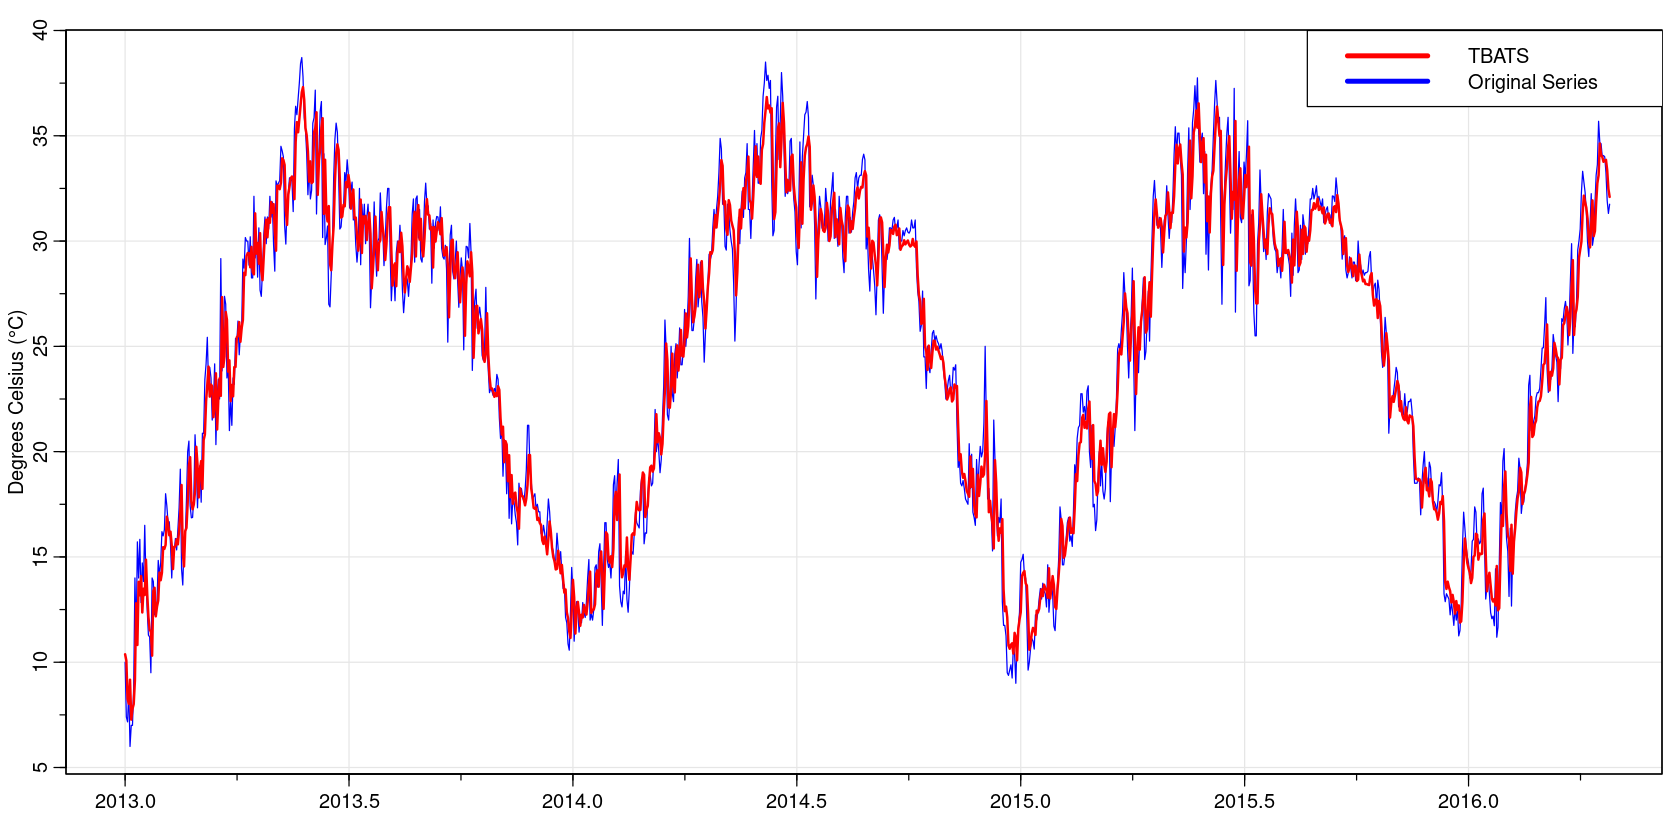

In [30]:
tsplot(delhi_train,col='blue',lwd=1, xlim=c(2013,2016.3),xlab='',ylab='Degrees Celsius (°C)')
lines(tb$fitted.values,col='red',lwd=2)
legend(2015.64, 40, legend=c("TBATS", "Original Series"),
       col=c("red", "blue"), lty=1, lwd=4, cex=1)

In [31]:
tb_forecast=forecast(tb, h=365)

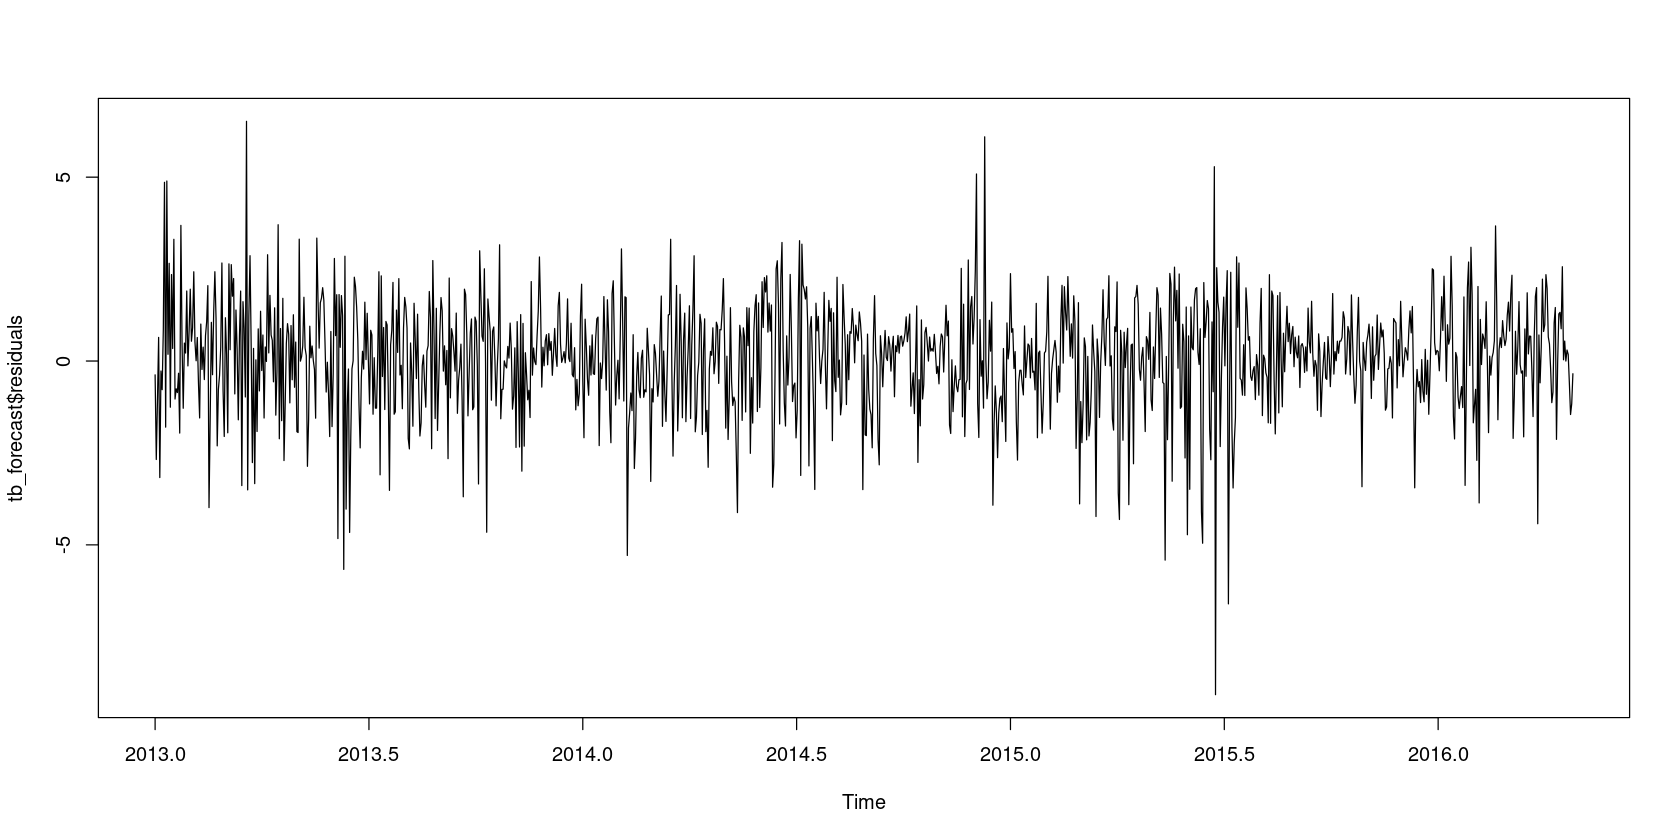

In [32]:
plot(tb_forecast$residuals)

ACF,0,0,0,0.03,-0.02,-0.01,-0.02,0,-0.05,-0.04,⋯,0.01,0.00,-0.02,0.02,-0.03,-0.01,-0.01,0.00,0.03,0.00
PACF,0,0,0,0.03,-0.02,-0.01,-0.02,0,-0.05,-0.04,⋯,0.01,0.01,-0.01,0.04,0.00,0.02,-0.03,0.03,0.02,-0.01


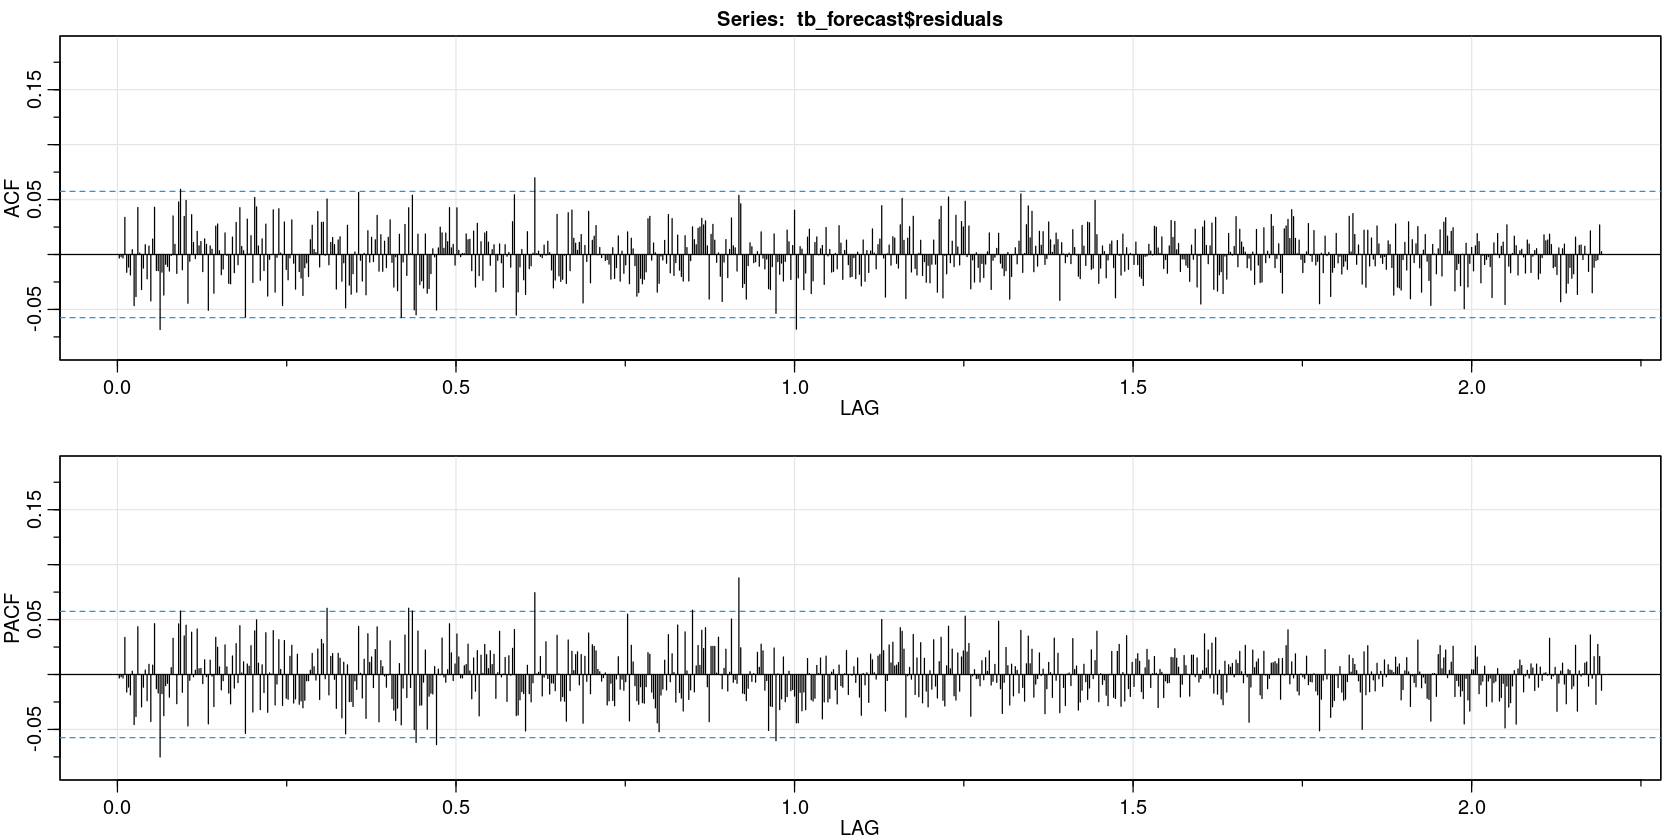

In [33]:
acf2(tb_forecast$residuals,max.lag = 800)

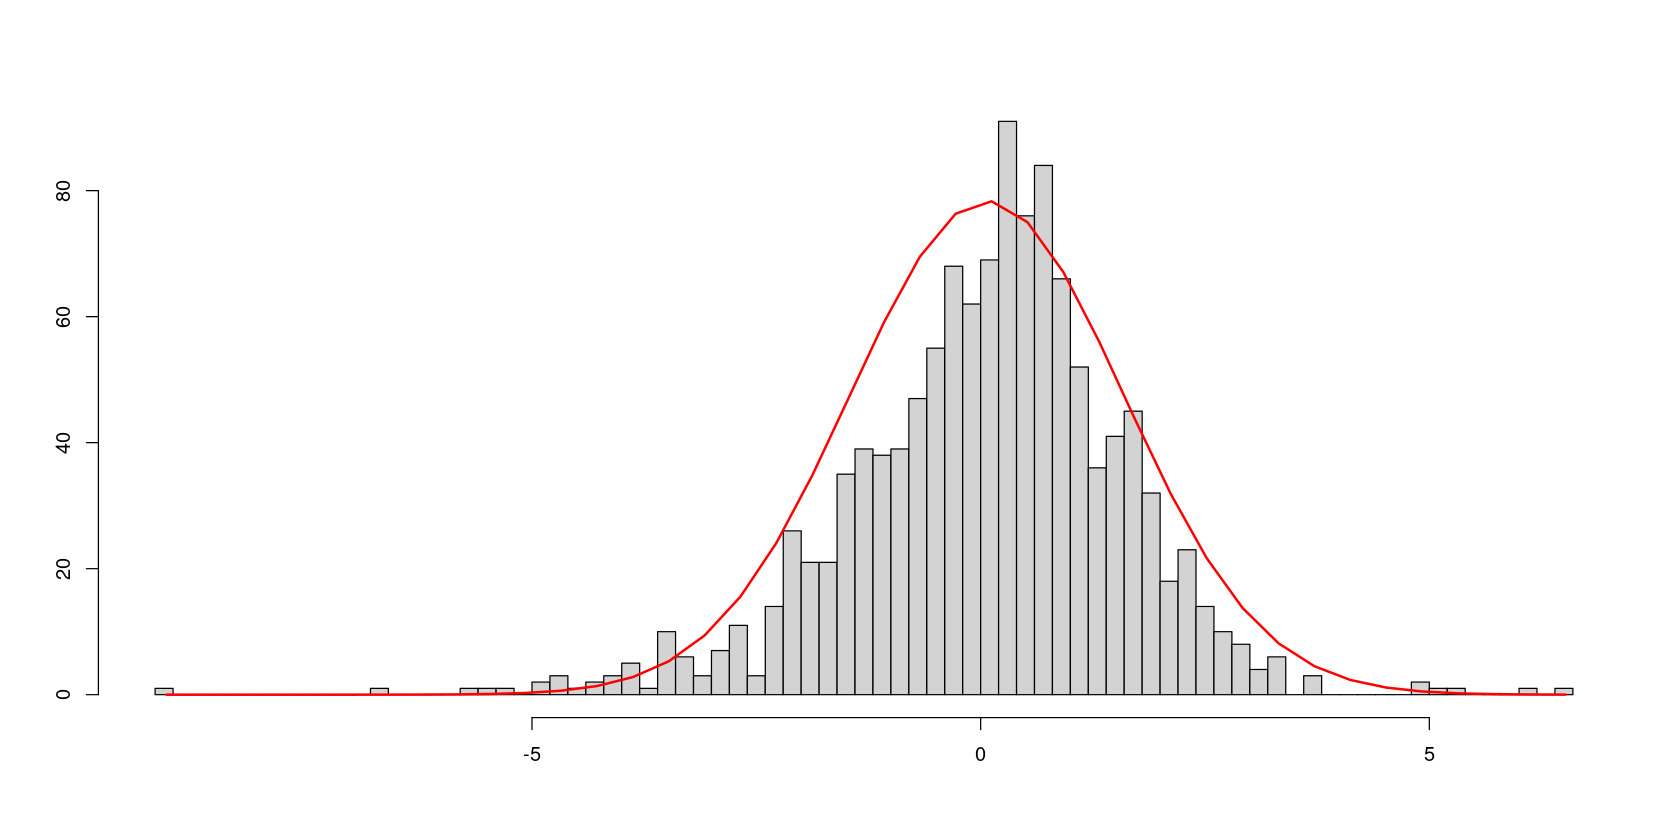

In [34]:
x=tb_forecast$residuals
h=hist(x, breaks=100,ylab='',main='',xlab='')
xfit=seq(min(x),max(x),length=40)
yfit=dnorm(xfit,mean=mean(x),sd=sd(x))
yfit=yfit*diff(h$mids[1:2])*1500
lines(xfit, yfit, col="red", lwd=2)

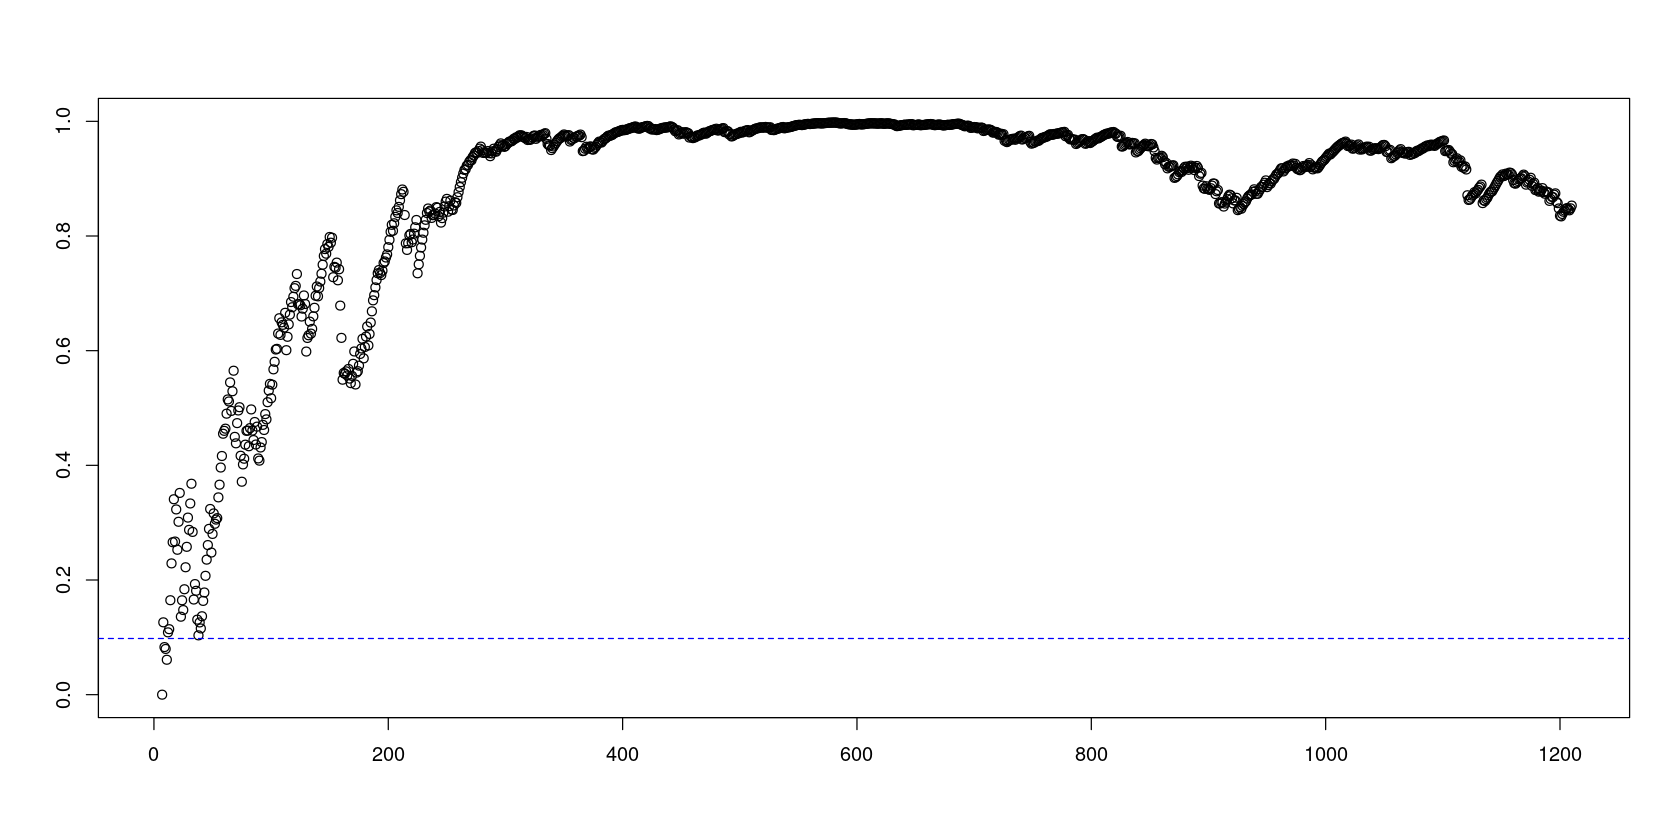

In [35]:
res=NULL
for (i in length(tb$parameters$vect):1211){
  q=Box.test(tb_forecast$residuals,lag=i,type="Ljung-Box",fitdf = length(tb$parameters$vect))
  res[i]=q$p.value
}

plot(res,ylim=c(0,1),xlab='',ylab='')
abline(h=0.098,col="blue",lty=2)

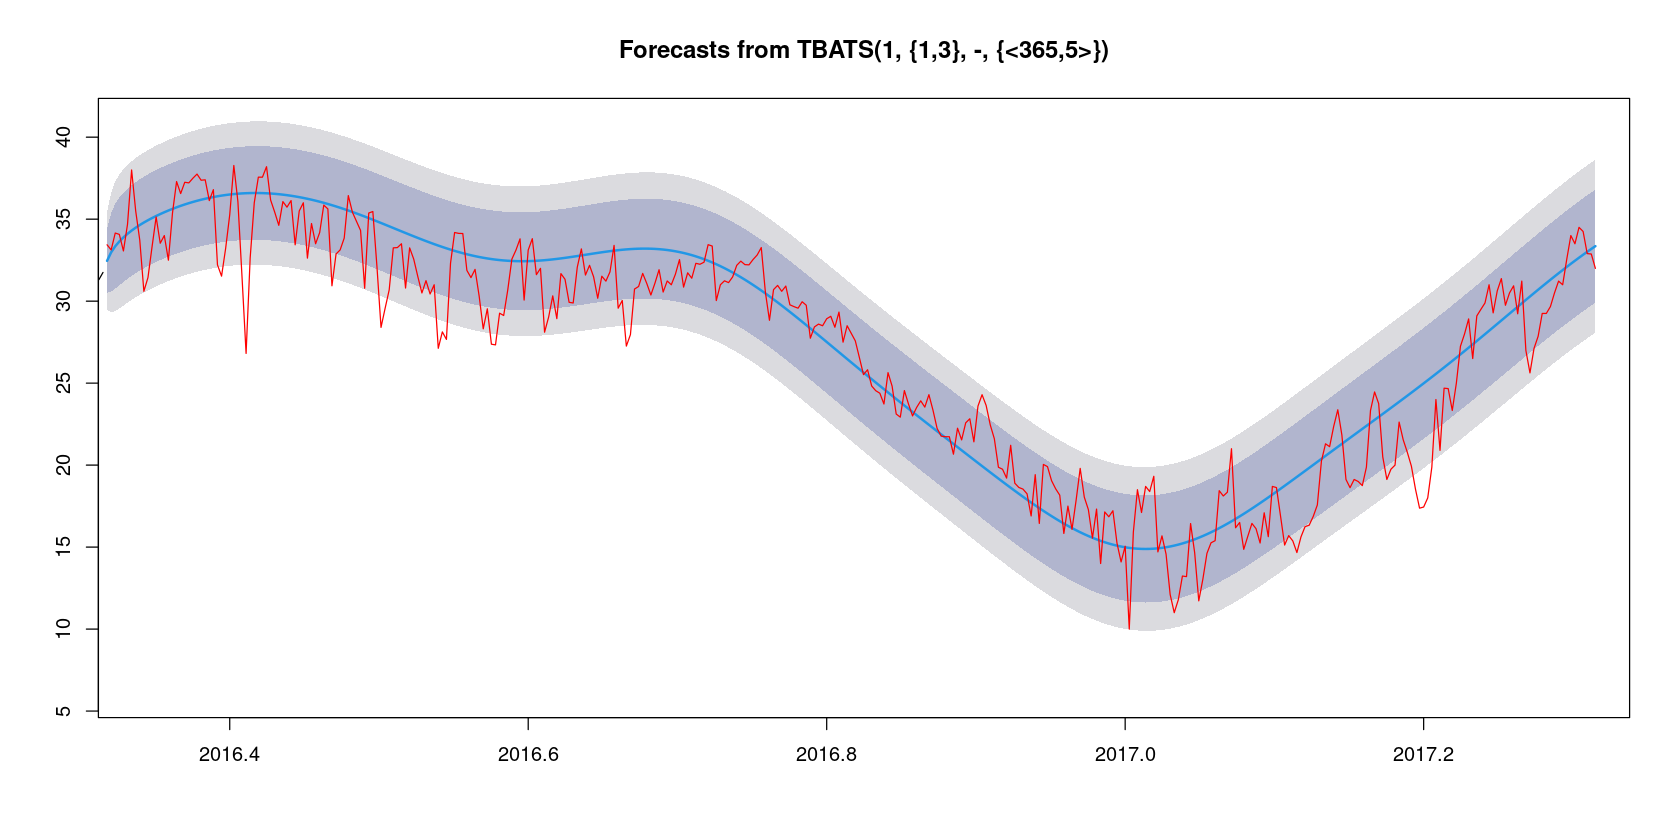

In [36]:
plot(tb_forecast,xlim=c(2016.35,2017.3))
lines(delhi_test,col='red')

In [37]:
accuracy(tb_forecast,delhi_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.06970146,1.528474,1.153669,-0.2090841,5.173956,0.4524784,-0.003192446,NA
Test set,-0.71546584,2.390327,1.854538,-3.2244546,7.892596,0.7273648,0.711772145,1.355882


# ANN

In [38]:
ann=nnetar(delhi_train)

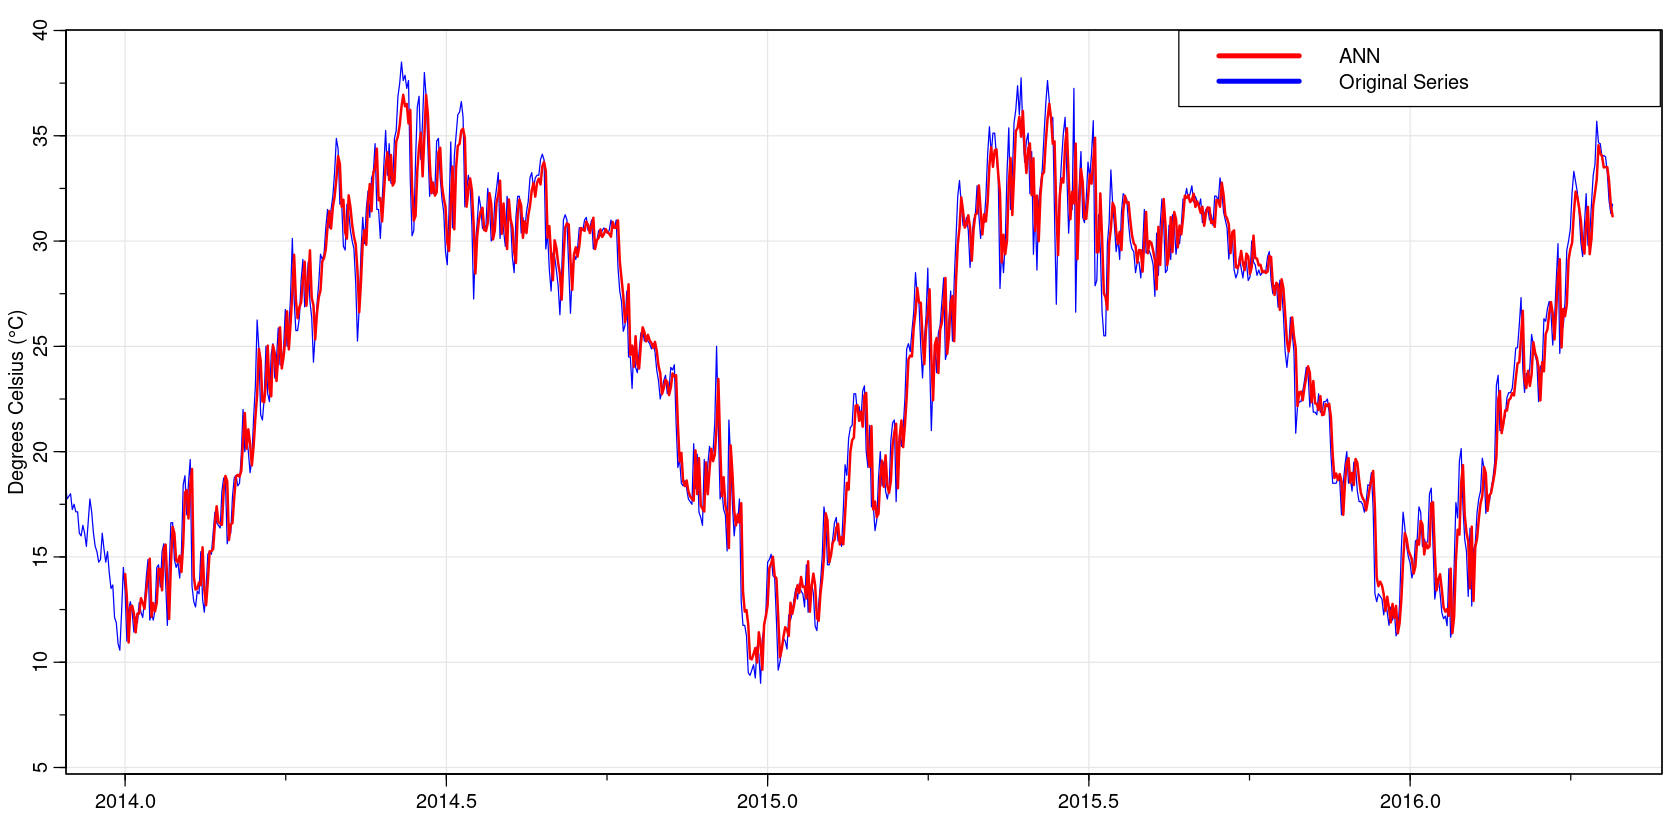

In [39]:
tsplot(delhi_train,col='blue',lwd=1, xlim=c(2014,2016.3),xlab='',ylab='Degrees Celsius (°C)')
lines(ann$fitted,col='red',lwd=2)
legend(2015.64, 40, legend=c("ANN", "Original Series"),
       col=c("red", "blue"), lty=1, lwd=4, cex=1)

In [40]:
#Takes some time with PI=TRUE. This is used to compute the confidence intervals
ann_forecast=forecast(ann,PI=TRUE, h=365)

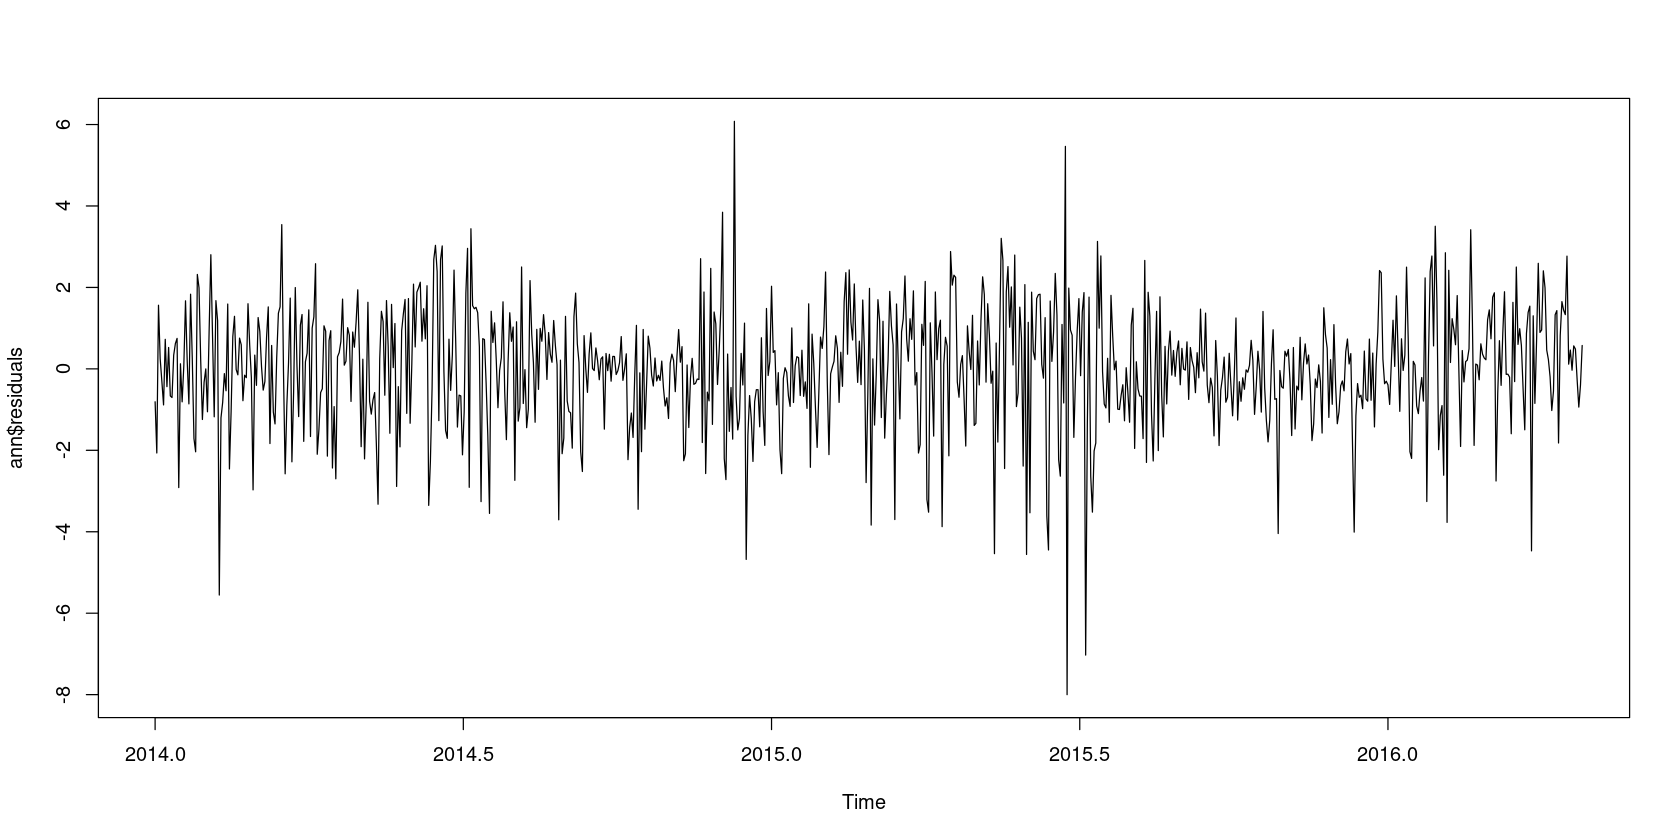

In [41]:
plot(ann$residuals,xlim=c(2014,2016.3))

ACF,0,-0.01,-0.01,0,-0.06,0,0.00,0.03,-0.06,0.01,⋯,0,-0.01,0.01,-0.01,-0.01,0.00,0,-0.01,0,0.00
PACF,0,-0.01,-0.01,0,-0.06,0,-0.01,0.03,-0.06,0.01,⋯,0,0.00,-0.01,0.02,-0.01,0.01,0,-0.01,0,-0.01


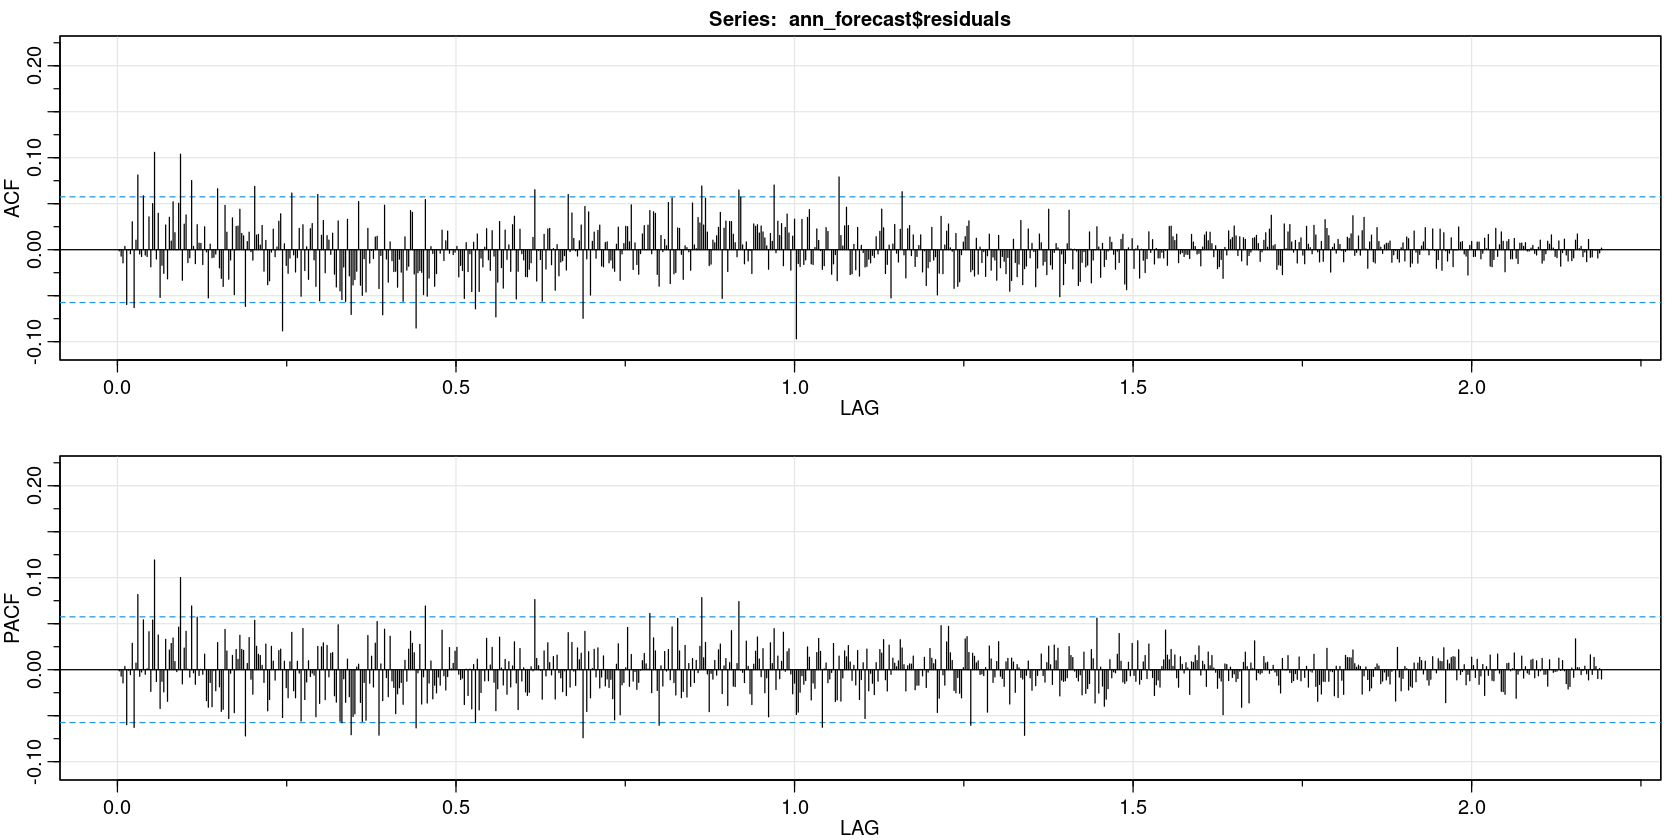

In [42]:
acf2(ann_forecast$residuals,max.lag = 800)

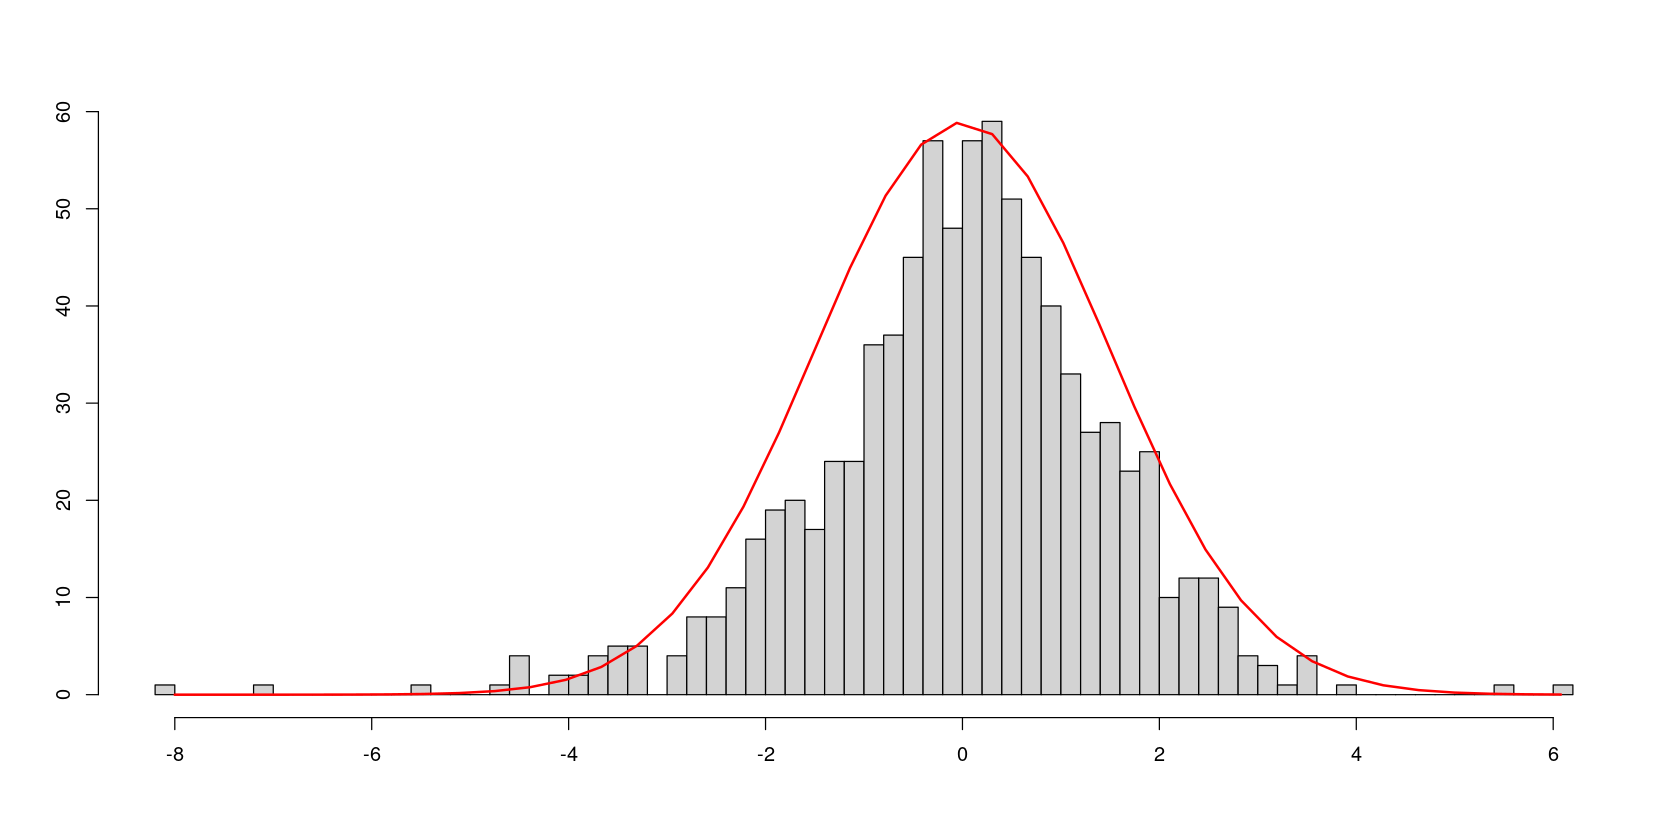

In [43]:
x=ann_forecast$residuals[366:1211]
h=hist(x, breaks=100,ylab='',main='',xlab='')
xfit=seq(min(x),max(x),length=40)
yfit=dnorm(xfit,mean=mean(x),sd=sd(x))
yfit=yfit*diff(h$mids[1:2])*1100
lines(xfit, yfit, col="red", lwd=2)

In [44]:
ann$method
ann$model

[1] "NNAR(4,1,3)[365]"


Average of 20 networks, each of which is
a 5-3-1 network with 22 weights
options were - linear output units 

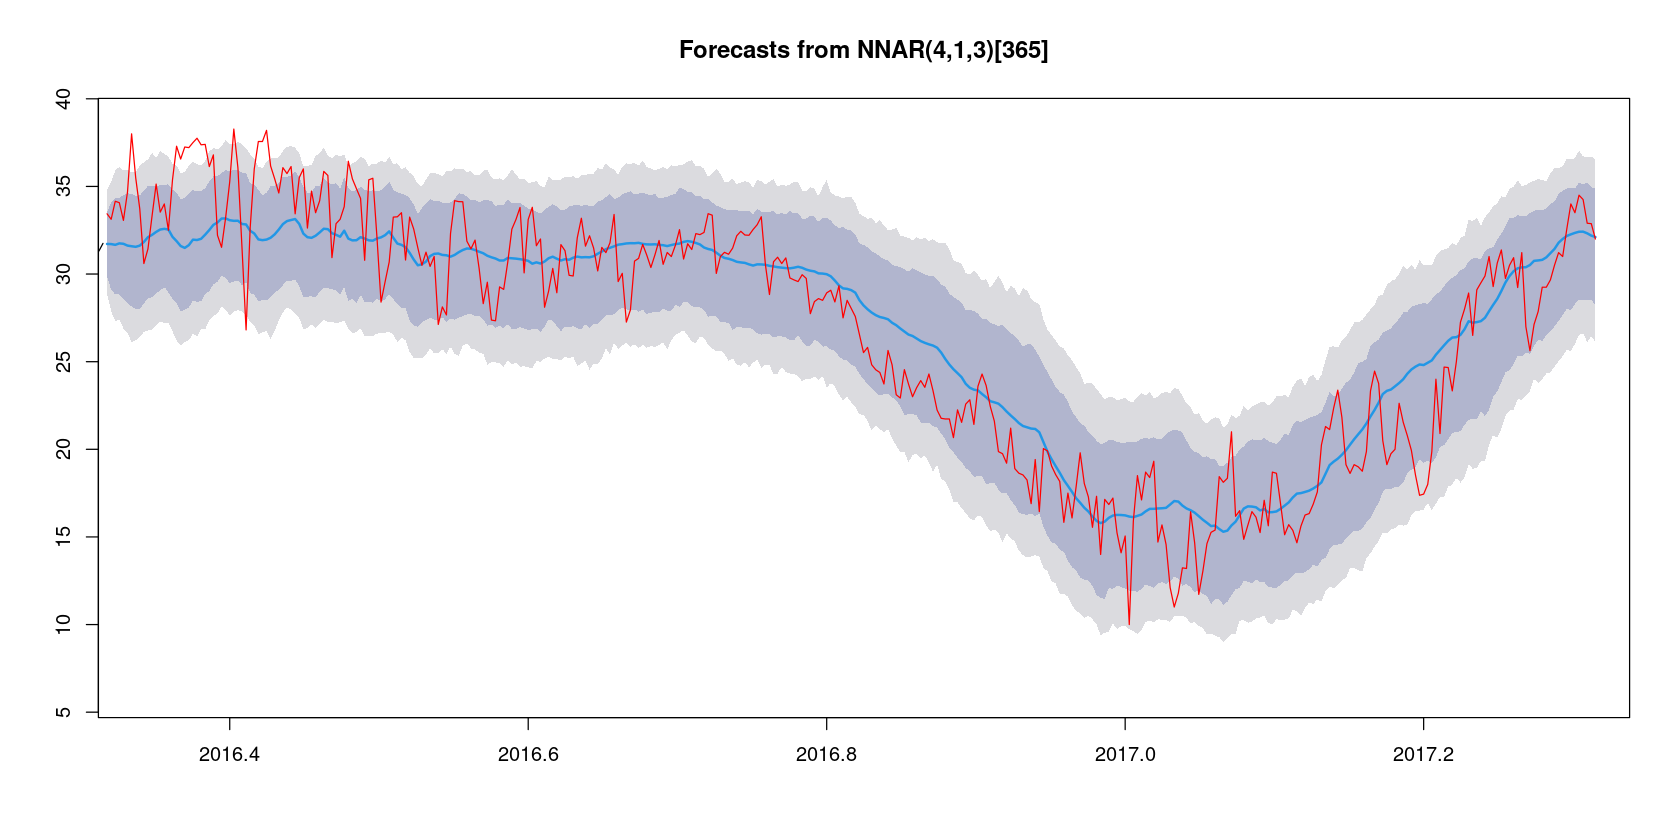

In [45]:
plot(ann_forecast,xlim=c(2016.35,2017.3))
lines(delhi_test,col='red')

In [46]:
accuracy(ann_forecast,delhi_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0005794384,1.489618,1.121739,-0.4813733,5.005341,0.4399552,-0.001232054,NA
Test set,-0.1591208625,2.521694,2.014715,-2.3088805,8.404603,0.7901877,0.757566215,1.41024
